# Predict Etherum Price Action

#### By Gautham Nagendra

#### Ethereum is the community-run technology powering the cryptocurrency ether (ETH) and thousands of decentralized applications

The first Bitcoin alternative created was, Ethereum (ETH), is a decentralized software platform that enables smart contracts and decentralized applications (dApps) to be built and run without any downtime, fraud, control, or interference from a third party. The goal behind Ethereum is to create a decentralized suite of financial products that anyone in the world can freely access, regardless of nationality, ethnicity, or faith.4 This aspect makes the implications for those in some countries more compelling because those without state infrastructure and state identifications can get access to bank accounts, loans, insurance, or a variety of other financial products. 

The applications on Ethereum are run on ether, its platform-specific cryptographic token. Ether (ETH) is like a vehicle for moving around on the Ethereum platform and is sought mostly by developers looking to develop and run applications inside Ethereum, or now, by investors looking to make purchases of other digital currencies using ether. Ether, launched in 2015, is currently the second-largest digital currency by market capitalization after Bitcoin, although it lags behind the dominant cryptocurrency by a significant margin.5 Trading at around $2,500 per ETH as of January 2022, ether’s market cap is just over half of bitcoin's.6

In 2014, Ethereum launched a presale for ether, which received an overwhelming response; this helped to usher in the age of the ICO. According to Ethereum, it can be used to “codify, decentralize, secure and trade just about anything.” Following the attack on the decentralized autonomous organization (DAO) in 2016, Ethereum was split into Ethereum (ETH) and Ethereum Classic (ETC).7

In December 2020, Ethereum transitioned its consensus algorithm from proof of work (PoW) to proof-of-stake (PoS).8 This move is intended to allow Ethereum’s network to run itself with far less energy and improved transaction speed, as well as to make for a more deflationary economic environment. PoS allows network participants to “stake” their ether to the network. This process helps to secure the network and process the transactions that occur. Those who do this are rewarded with ether, similarly to how an interest account works.9 This is an alternative to Bitcoin’s PoW mechanism, by which miners receive more BTCs for processing transactions.10

https://www.investopedia.com/tech/most-important-cryptocurrencies-other-than-bitcoin/ 

### Use Facebook Prophet package to understand ETH Price Action

In [1]:
#Install the required packages and 

!pip install prophet
!pip install yfinance

#Import Required Packages 

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Importing plotly failed. Interactive plots will not work.


In [25]:
# extract ETH prices using yfinance
df = yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [26]:
# Lets look at the recent prices of ETH
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-28,2421.646973,2548.778564,2367.833740,2547.092041,2547.092041,14666227351
2022-01-29,2546.590576,2627.609375,2526.989746,2597.084717,2597.084717,11172062661
2022-01-30,2598.564941,2631.408447,2550.460938,2603.466553,2603.466553,9501221177
2022-01-31,2603.263428,2697.735352,2489.072266,2688.278809,2688.278809,13778234614
2022-02-01,2682.621826,2801.455566,2682.621826,2781.977783,2781.977783,13630395392


In [27]:
# Reset Date as Index
df.reset_index(inplace = True)

# Extract Just Adjusted Close price
df = df[['Date', 'Adj Close']]

#Rename Columns
df.columns = ['ds', 'y']

In [28]:
# Lets look at the last few readings of the new DF
df.tail()

,ds,y
1541,2022-01-28,2547.092041
1542,2022-01-29,2597.084717
1543,2022-01-30,2603.466553
1544,2022-01-31,2688.278809
1545,2022-02-01,2781.977783


In [29]:
# Import the Prophet Model
model = Prophet()

In [30]:
# Now lets fit the model to the dataframe
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -39.9741


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3412.53     0.0274124       515.365      0.2163           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       3420.62   0.000250085       156.749   1.142e-06       0.001      250  LS failed, Hessian reset 
     199       3423.91    0.00240346        119.02       4.276      0.4276      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       3428.23   0.000268447       94.6975   8.001e-07       0.001      371  LS failed, Hessian reset 
     299       3432.39     0.0301782       189.663           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3443.74    0.00270588       200.263           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha

In [31]:
# Lets look at the model components
# model looks at only yearly and weekly seasoanlity 
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [32]:
#lets look at the 
df.tail()

,ds,y
1541,2022-01-28,2547.092041
1542,2022-01-29,2597.084717
1543,2022-01-30,2603.466553
1544,2022-01-31,2688.278809
1545,2022-02-01,2781.977783


In [33]:
# Lets Make some prediction for the next 90 days
future_dates = model.make_future_dataframe(periods = 90)

In [34]:
# lets take a look at the latest predicitons
future_dates.tail()

,ds
1631,2022-04-28
1632,2022-04-29
1633,2022-04-30
1634,2022-05-01
1635,2022-05-02


In [35]:
# Lets predict the ETH price for the future dates
prediction = model.predict(future_dates)

In [36]:
# We can look at the last few componenets from the predicted model
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1631,2022-04-28,4792.553138,4582.749007,5371.240334,4733.280525,4845.866246,201.001791,201.001791,201.001791,0.019638,0.019638,0.019638,200.982154,200.982154,200.982154,0.0,0.0,0.0,4993.554929
1632,2022-04-29,4799.515758,4641.939677,5409.547098,4738.998704,4854.348048,216.911244,216.911244,216.911244,-5.382966,-5.382966,-5.382966,222.294210,222.294210,222.294210,0.0,0.0,0.0,5016.427003
1633,2022-04-30,4806.478379,4659.581713,5406.904427,4744.806290,4862.730488,241.151464,241.151464,241.151464,-1.279156,-1.279156,-1.279156,242.430620,242.430620,242.430620,0.0,0.0,0.0,5047.629843
1634,2022-05-01,4813.441000,4705.935166,5465.333921,4751.601449,4871.032408,262.813701,262.813701,262.813701,1.680823,1.680823,1.680823,261.132878,261.132878,261.132878,0.0,0.0,0.0,5076.254701
1635,2022-05-02,4820.403621,4692.257823,5448.547647,4757.157867,4878.866017,277.301478,277.301478,277.301478,-0.863066,-0.863066,-0.863066,278.164544,278.164544,278.164544,0.0,0.0,0.0,5097.705098


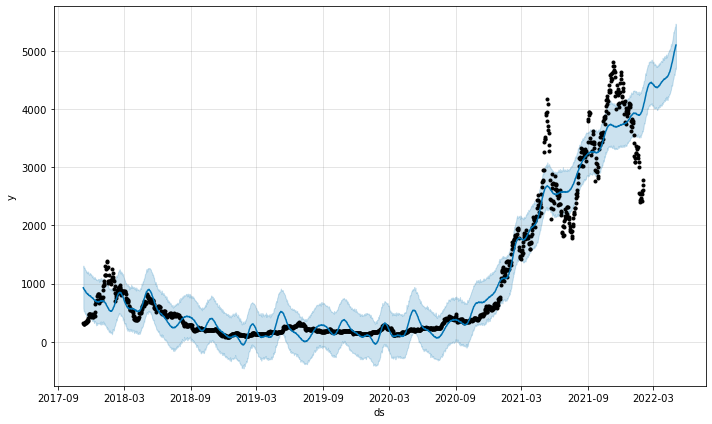

In [37]:
# lets plot with the prediciton
fig = model.plot(prediction)

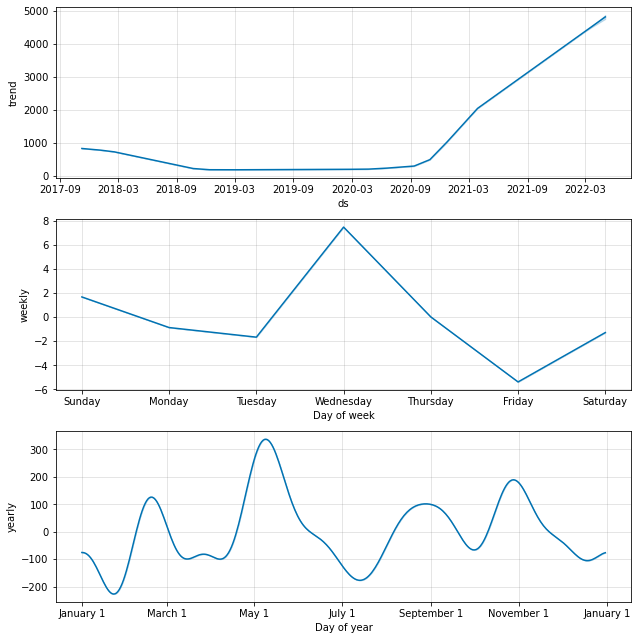

In [46]:
#lets identfy the best fit based on the time duration
fig2 = model.plot_components(prediction)

# From the figure we can see that ETH prices are high on wednesday and low on friday
# May last year had the highest ETH price

In [47]:
## Lets check if model is right##

# lets validate the time series model
from prophet.diagnostics import cross_validation

In [56]:
#selecting a time horizon of 30 days to bacvktest model
df_cv = cross_validation(model, horizon = '30 days')

INFO:prophet:Making 77 forecasts with cutoffs between 2018-11-19 00:00:00 and 2022-01-02 00:00:00


  0%|          | 0/77 [00:00<?, ?it/s]

Initial log joint probability = -16.0594
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1048.39   4.42951e-06       84.4871      0.2716      0.2716      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143        1048.4   6.90336e-06       98.0178   6.925e-08       0.001      226  LS failed, Hessian reset 
     158        1048.4   3.97805e-08       79.6539      0.2071      0.7953      246   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -16.7383
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      34        1075.1   0.000306579       37.9197   1.266e-05       0.001       85  LS failed, Hessian reset 
      99       1075.59   4.17824e-05       58.4175      0.4945      0.4945      173   
    Iter      log prob        ||dx||      ||grad||   

Initial log joint probability = -15.6729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1128.44     0.0450147       146.075           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          1202     0.0106813       269.934       0.884       0.884      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       1208.21   0.000148622       79.6488   3.254e-06       0.001      390  LS failed, Hessian reset 
     299        1208.4   0.000753755       51.8274      0.8636      0.8636      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301        1208.4   2.99279e-05       37.5791   8.698e-07       0.001      451  LS failed, Hessian reset 
     399        1213.2      0.011631       130.296           1           1      570   
    Iter      log pro

Initial log joint probability = -14.7126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1194.87     0.0105308       155.629      0.7912      0.7912      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1225.09      0.109156        222.31       6.678           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       1225.34   0.000483983        154.08   2.056e-06       0.001      291  LS failed, Hessian reset 
     299       1239.08     0.0326951       215.183           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       1247.12   0.000691323       166.563   1.754e-06       0.001      563  LS failed, Hessian reset 
     399       1248.91   0.000789316       87.2215     0.03483           1      578   
    Iter      log pro

Initial log joint probability = -14.7631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1374.12     0.0106088       278.553      0.6074      0.6074      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1424.65     0.0263504       1364.11      0.5285      0.5285      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1448.24    0.00670974       152.054           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       1453.87   0.000702632       325.744    1.73e-06       0.001      507  LS failed, Hessian reset 
     399        1454.7   0.000240762       103.901      0.5461      0.5461      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     479       1456.39    0.00148714    

Initial log joint probability = -14.8484
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       1545.44   0.000721469        236.23   4.095e-06       0.001      123  LS failed, Hessian reset 
      99       1563.16    0.00535616       95.0105       0.839       0.839      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1600.34    0.00216541       153.675       0.386      0.0386      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1640.71     0.0247207       360.342        0.15           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       1646.95   0.000586615        217.83   3.992e-06       0.001      490  LS failed, Hessian reset 
     375       1651.44   0.000237707       139.156   2.399e-06       0.001      588  LS failed, Hessian rese

Initial log joint probability = -15.0024
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1703.57     0.0658616       399.188      0.4149           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1750.28    0.00325742       235.184      0.3853       0.992      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1764.72   0.000512467       195.045   4.535e-06       0.001      357  LS failed, Hessian reset 
     299       1767.64    0.00407721       128.051      0.2141           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       1769.06   0.000227068       104.581   1.527e-06       0.001      440  LS failed, Hessian reset 
     399       1786.86    0.00820122        88.152           1           1      552   
    Iter      log pro

Initial log joint probability = -14.8275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1733.75      0.010518        233.29      0.3253      0.3253      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1803.87     0.0231128       495.197       0.906       0.906      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1856.91     0.0419033       411.585      0.4418           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1872.09     0.0336555       307.013           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     459       1892.06   0.000128481       89.8087   1.048e-06       0.001      578  LS failed, Hessian reset 
     499       1893.69    0.00113536    

Initial log joint probability = -15.0419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1846.56     0.0210204       233.799           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157        1867.9   0.000352327       128.764   1.801e-06       0.001      215  LS failed, Hessian reset 
     199       1878.99    0.00519431       200.708           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1922.49     0.0103778       140.579           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       1930.49   0.000262045       118.321   3.421e-06       0.001      489  LS failed, Hessian reset 
     399       1934.38     0.0686022       785.418           1           1      552   
    Iter      log pro

Initial log joint probability = -14.9232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1936.78     0.0174311       211.037      0.6419           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          2008      0.189098       589.889           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2043.76    0.00971183       283.072      0.1732           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2066.26    0.00519891       274.756           1           1      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     452       2075.96     0.0002552       143.425   1.585e-06       0.001      584  LS failed, Hessian reset 
     499       2079.17       0.03875    

Initial log joint probability = -15.1967
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2056.82     0.0130537       179.357           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2119.12     0.0169109       893.641      0.3518      0.3518      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       2167.31   0.000862484        139.11   5.022e-06       0.001      367  LS failed, Hessian reset 
     299       2172.74    0.00676956       125.538           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2188.62      0.079759       418.501           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2199.66    0.00968386    

Initial log joint probability = -15.3062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2121.37      0.037471       559.189           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2164.81     0.0324141       368.811           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2220.59    0.00381387       168.025      0.4555      0.4555      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312          2223   0.000143924        65.552   1.025e-06       0.001      409  LS failed, Hessian reset 
     355       2230.67   0.000361531       182.182   1.018e-06       0.001      518  LS failed, Hessian reset 
     399       2241.67    0.00226544       125.298           1           1      574   
    Iter      log pro

Initial log joint probability = -19.0993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2178.77     0.0795048       150.147           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2264.94     0.0105087       437.947      0.5272      0.5272      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       2283.73   0.000199529       115.592   2.343e-06       0.001      388  LS failed, Hessian reset 
     299       2284.36   0.000707298       105.144      0.3596           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2310.48     0.0144013        141.59       0.809       0.809      527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     417       2317.02    0.00117362    

Initial log joint probability = -17.6127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2209.8   0.000934862       288.805      0.3845      0.3845      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2289.15    0.00677838       217.201           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       2299.28   0.000825087       337.858   5.377e-06       0.001      351  LS failed, Hessian reset 
     299       2307.02   0.000199075        107.58   1.348e-06       0.001      435  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       2309.65   0.000248274        136.34   1.487e-06       0.001      506  LS failed, Hessian reset 
     399       2319.75     0.0537238       332.478           1           1      583 

Initial log joint probability = -19.5213
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2325.58     0.0422086       1209.56       0.498       0.498      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2400.08     0.0172566       625.881       0.733       0.733      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2421.8      0.013907       146.936        8.41       0.841      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       2462.45    0.00118963       302.497    5.51e-06       0.001      512  LS failed, Hessian reset 
     399       2462.52   0.000157829       257.812      0.6132      0.6132      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2486.51    0.00387882    

Initial log joint probability = -26.2163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2419.83     0.0391594         280.7           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2467.75     0.0327492       523.529           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2509.3     0.0112856       275.294           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2526.44    0.00784732       74.1972           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       2530.64    0.00027702       109.341   8.135e-07       0.001      526  LS failed, Hessian reset 
     499       2540.62     0.0771948    

Initial log joint probability = -107.844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2427.8     0.0676241       270.224           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2465.74     0.0061276       91.2873           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2481.82     0.0148736       189.521      0.4922           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       2490.41   0.000639638        267.04    2.92e-06       0.001      426  LS failed, Hessian reset 
     345       2495.98   0.000587965       216.245   3.984e-06       0.001      484  LS failed, Hessian reset 
     399       2499.24    0.00226857       340.619      0.5523      0.5523      548   
    Iter      log pro

Initial log joint probability = -122.155
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2687.89    0.00914857       284.798      0.7181      0.7181      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2715.96    0.00548106        146.62           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2722.97    0.00992181       82.8423           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       2728.03   0.000468424       234.596   2.298e-06       0.001      452  LS failed, Hessian reset 
     399       2731.98     0.0015024       144.962           1           1      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2735.93     0.0427759    

Initial log joint probability = -126.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3010.83    0.00583667       1099.53      0.2135      0.2135      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3047.62    0.00338308        134.28           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3062.36   0.000227519       54.0865           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       3064.64   0.000734389       290.872   2.946e-06       0.001      444  LS failed, Hessian reset 
     383       3066.17   0.000103158       107.396   1.326e-06       0.001      528  LS failed, Hessian reset 
     396       3066.32   0.000124542       102.665   1.811e-06       0.001      582  LS failed, Hessian rese

Initial log joint probability = -58.7003
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3391.15     0.0153949       784.801           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3435.59   5.86883e-05       83.1621   5.129e-07       0.001      285  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3462.36     0.0131405       252.258      0.7676      0.7676      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3477.63    0.00287291       391.649      0.4046           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3487.41     0.0335708       519.039      0.5946      0.5946      644   
    Iter      log prob        ||dx||    

Initial log joint probability = -30.34
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3306.91    0.00730506       127.171           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126        3312.6   0.000346733       144.273   3.676e-06       0.001      190  LS failed, Hessian reset 
     188       3317.94   0.000114569       95.3243   7.034e-07       0.001      310  LS failed, Hessian reset 
     199        3318.4    0.00295808       91.5293           1           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       3319.62    0.00051218       155.773   6.242e-06       0.001      382  LS failed, Hessian reset 
     299       3325.59     0.0257847       280.935           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

Initial log joint probability = -80.4445
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3397.51    0.00408301       398.086           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3409.05     0.0147713       371.223           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3420.09     0.0217619       247.593       1.568      0.1568      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       3421.25   0.000117162       108.376   1.828e-06       0.001      471  LS failed, Hessian reset 
     399       3421.33   3.28974e-05       77.2056           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       3423.87    0.00028586    

Initial log joint probability = -85.4868
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3661.44    0.00104889       546.868      0.4886      0.4886      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3675.37    0.00436202       217.617           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3676.97   0.000139168       132.944   5.177e-07       0.001      291  LS failed, Hessian reset 
     299       3681.34    0.00581195       233.233           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       3682.96   0.000135756       147.645   1.057e-06       0.001      456  LS failed, Hessian reset 
     399          3686      0.003601       83.7093      0.1795           1      566   
    Iter      log pro

In [57]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2305,2022-01-28,4837.646088,4557.981611,5141.188848,2547.092041,2022-01-02
2306,2022-01-29,4848.648547,4559.429009,5163.879381,2597.084717,2022-01-02
2307,2022-01-30,4857.177380,4565.844518,5117.103560,2603.466553,2022-01-02
2308,2022-01-31,4865.999505,4565.956716,5161.662022,2688.278809,2022-01-02
2309,2022-02-01,4872.110508,4562.067490,5158.584873,2781.977783,2022-01-02


In [58]:
# Lets looks at the metrics to understand the prediciton performace
from prophet.diagnostics import performance_metrics

In [59]:
#Running the performace on the Predicited dataframe
df_performance = performance_metrics(df_cv)

In [60]:
#lets looks the dataframe with metrics
# We can look at MAPE -- Mean Absolute percentage Error
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,92971.948258,304.913018,185.216403,0.300977,0.174902,0.305899,0.515152
1,4 days,97274.594317,311.888753,187.209167,0.322489,0.180587,0.319437,0.515152
2,5 days,104667.068015,323.522902,193.664490,0.345747,0.186133,0.334943,0.515152
3,6 days,116883.569617,341.882391,204.882787,0.369872,0.218353,0.353393,0.497835
4,7 days,125298.658402,353.975505,216.956454,0.397904,0.222806,0.374610,0.476190
5,8 days,129107.280053,359.315015,224.240281,0.423168,0.224025,0.392561,0.445887
6,9 days,128535.976229,358.519143,228.419979,0.446902,0.232528,0.406008,0.428571
7,10 days,128595.192398,358.601718,235.611269,0.469561,0.232528,0.418080,0.415584
8,11 days,138897.192627,372.689137,248.615682,0.493526,0.237236,0.430137,0.402597
9,12 days,149526.153239,386.686117,260.338437,0.516695,0.243620,0.442365,0.389610


/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


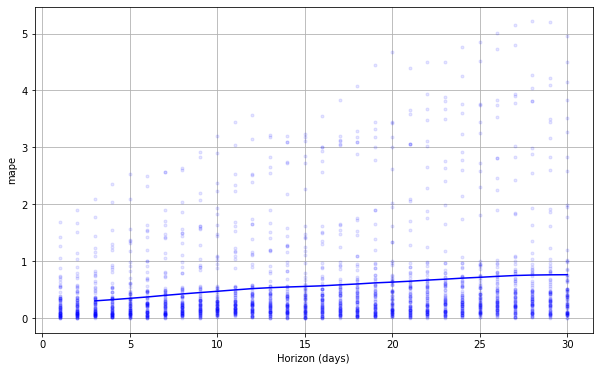

In [61]:
# MAPE needs to typcially less than 10% to have confidence in prediction. 

# MAPE is 30% or higher saying model needs further tunning and have higher prediciton 
from prophet import plot

fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')